In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


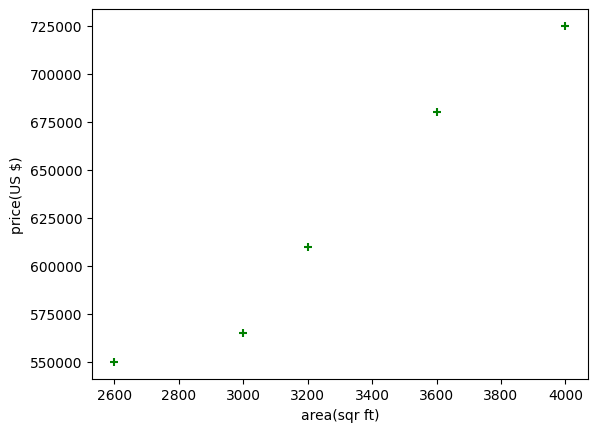

In [5]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(US $)")
plt.scatter(df.area, df.price, color = 'green', marker='+')

In [6]:
#Create a linear regression object
reg = linear_model.LinearRegression()
#fitting my data (training the linear regression model using the availabe data points)
reg.fit(df[['area']], df.price)

LinearRegression()

In [15]:
predicted_value = reg.predict([[3300]])
predicted_value

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [11]:
#Disply the value of coefficient
coefficient = reg.coef_
coefficient

array([135.78767123])

In [12]:
# Disply the value of intercept
intercept = reg.intercept_
intercept

180616.43835616432

In [17]:
# How linear regression model works under the hood:
# the modele predict the value by following the formula below:
# formula: y = mx + b
# price = coefficient * area + intercept
price = coefficient * 3300 + intercept
print("price using formula:", price)
# the predicted value by reg.predict([[3300]]) was array([628715.75342466])
print("price using reg.predict([[3300]]):", predicted_value)
print("is price using formula equals to the predicted value?", price == predicted_value)

price using formula: [628715.75342466]
price using reg.predict([[3300]]): [628715.75342466]
is price using formula equals to the predicted value? [ True]


In [18]:
# CSV file contain areas to predict the prices:
areas = pd.read_csv("areas.csv")
areas

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [20]:
prices = reg.predict(areas)
prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [22]:
# Add the prices as a new column on our dataframe:
areas['prices'] = prices
areas

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [26]:
areas.to_csv("prediction.csv", index=False)

In [27]:
pr = pd.read_csv("prediction.csv")
pr

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


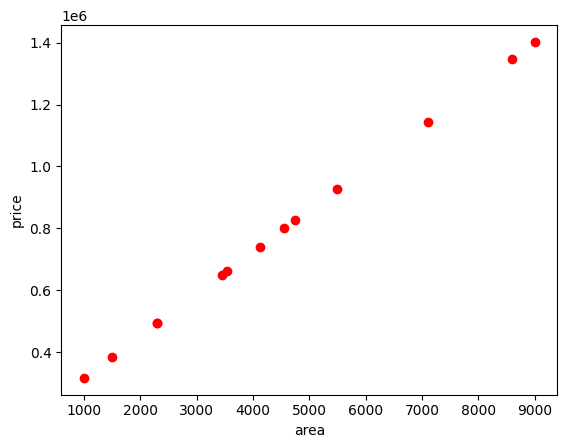

In [28]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(pr.area, pr.prices, color = 'red')